In [15]:
# If you're using Colab, you don't need to install PyTorch manually as it's pre-installed.
# However, if you're working locally, use the following command:
!pip install torch torchvision


In [16]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Faster R-CNN model with pre-trained weights
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [17]:
video_path = r'C:\Users\Tipu Sultan\OneDrive\Desktop\New folder\PETS09-S2L1-raw.webm'

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open video.")
else:
    print("Video loaded successfully.")


Video loaded successfully.


In [18]:
def detect_objects(frame):
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = F.to_tensor(image).unsqueeze(0)  

    with torch.no_grad():
        predictions = model(image)
    
    return predictions[0]

In [19]:
def draw_boxes(frame, predictions, threshold=0.5):
   
    for i, box in enumerate(predictions['boxes']):
        score = predictions['scores'][i]
        if score > threshold:
          
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            label = f"{predictions['labels'][i]}: {score:.2f}"
            cv2.putText(frame, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    return frame

In [20]:
def get_frame_at_position(cap, frame_number):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    if not ret:
        print(f"Error: Couldn't read frame {frame_number}")
    return frame

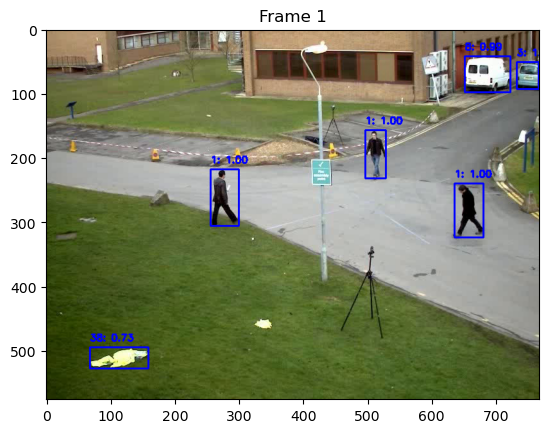

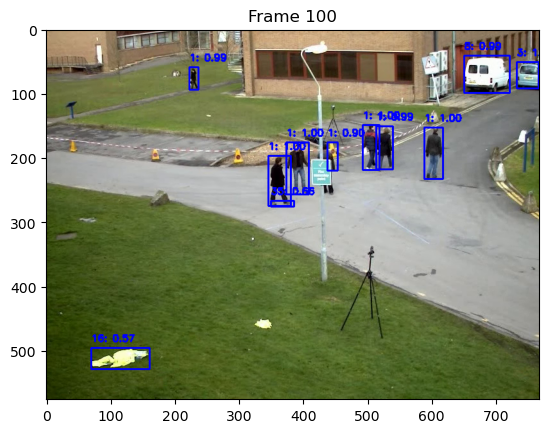

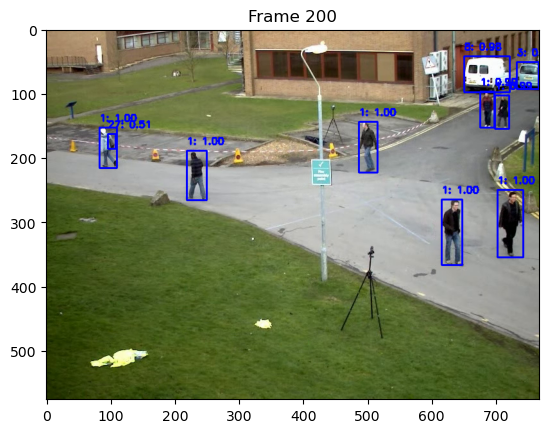

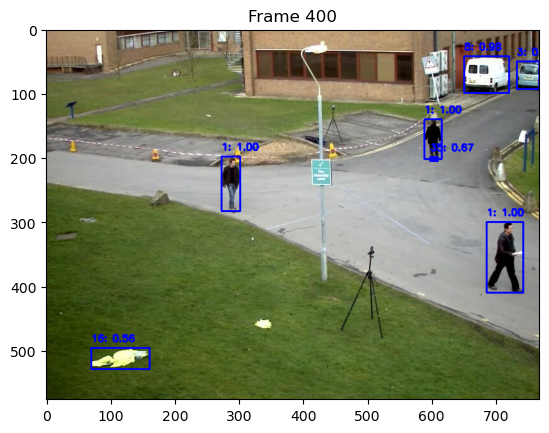

In [21]:
frame_numbers = [1, 100, 200, 400]
for frame_num in frame_numbers:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret, frame = cap.read()
    
    if ret:
        predictions = detect_objects(frame)
        frame_with_boxes = draw_boxes(frame, predictions)
        plt.imshow(cv2.cvtColor(frame_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {frame_num}")
        plt.show()

cap.release() 